Visualization of Data

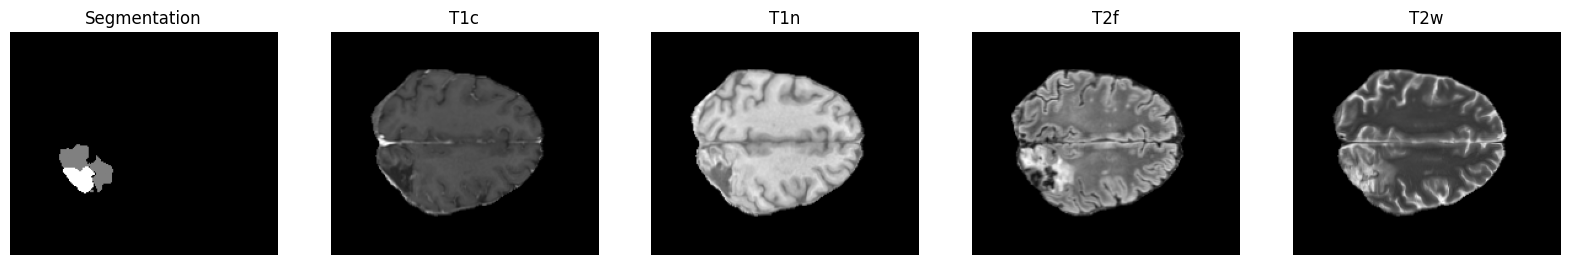

In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the NIfTI files
ds_path = "data"
data_id = "BraTS-GLI-00005-100"
files = [
    f'{data_id}-seg.nii.gz',
    f'{data_id}-t1c.nii.gz',
    f'{data_id}-t1n.nii.gz',
    f'{data_id}-t2f.nii.gz',
    f'{data_id}-t2w.nii.gz'
]

# Function to load a NIfTI file and return its data
def load_nifti(file_path):
    img = nib.load(file_path)
    data = img.get_fdata()
    return data

# Load all files
images = [load_nifti(os.path.join(ds_path, data_id, file)) for file in files]
titles = ['Segmentation', 'T1c', 'T1n', 'T2f', 'T2w']

# Plot slices
fig, axes = plt.subplots(1, len(images), figsize=(20, 10))

# Select a slice to display (e.g., the middle slice)
slice_idx = int(images[0].shape[2] * 0.7)

for i, (image, title) in enumerate(zip(images, titles)):
    axes[i].imshow(image[:, :, slice_idx], cmap='gray')
    axes[i].set_title(title)
    axes[i].axis('off')

plt.show()


Mesh Generation

In [2]:
import nibabel as nib
import numpy as np
import os
import imageio
from skimage import measure
import trimesh

# Load the NIfTI files
ds_path =  "data"
data_id = "BraTS-GLI-00005-100"
output_path = "output"
labels = ['seg', 't1c', 't1n', 't2f', 't2w']

# Function to load a NIfTI file and return its data
def load_nifti(file_path):
    img = nib.load(file_path)
    data = img.get_fdata()
    return data
for label in labels:   
    # Load the NIfTI file (e.g., the segmentation file)
    file_path = f"{ds_path}\\{data_id}\\{data_id}-{label}.nii.gz"

    def load_nifti(file_path):
        img = nib.load(file_path)
        data = img.get_fdata()
        return data

    # Load the segmentation data
    data = load_nifti(file_path)

    # Create a binary volume from the segmentation data
    slices = []
    for slice in data:
        if slice.sum()>0:
            slices.append(slice)
            


    # Stack the slices to create a 3D volume
    volume = np.stack(slices, axis=-1)

    # Ensure the volume is binary
    binary_volume = volume > 0

    # Apply the Marching Cubes algorithm
    verts, faces, normals, values = measure.marching_cubes(binary_volume, level=0.0001)

    # Create a Trimesh object
    mesh = trimesh.Trimesh(vertices=verts, faces=faces, vertex_normals=normals)
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    # Export the mesh to an OBJ file
    mesh.export(f'{output_path}\\output-{label}.obj')
    print(f"3D Mesh Saved at: {output_path}\\output-{label}.obj")

3D Mesh Saved at: output\output-seg.obj
3D Mesh Saved at: output\output-t1c.obj
3D Mesh Saved at: output\output-t1n.obj
3D Mesh Saved at: output\output-t2f.obj
3D Mesh Saved at: output\output-t2w.obj
